# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [3]:
import pandas as pd

tabela = pd.read_csv('advertising.csv')
display(tabela)

#Passo 4: Ajuste de Dados (Tratamento/Limpeza)
print(tabela.info())

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [ ]:
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn (biblioteca de machine learning)

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

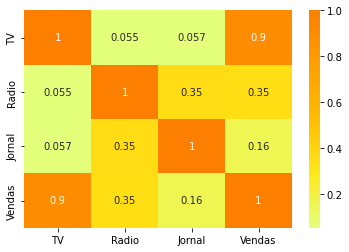

In [6]:
#Passo 5: Análise Exploratória
#correlação entre as colunas da tabela
display(tabela.corr())

#gráficos pode usar o:
#plotly
#matplotlib
#seaborn

import matplotlib.pyplot as plt
import seaborn as sns

#todo gráfico no python é criado em 2 etapas:
#primeira: cria o gráfico
sns.heatmap(tabela.corr(), cmap='Wistia', annot=True)

#segunda:exibe o gráfico




#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [12]:
#Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
#y é que você quer prever
y = tabela['Vendas']

#x são as colunas com os dados que serão usados para prever y
#para selecionar mais de uma 
x = tabela[['TV', 'Radio', 'Jornal']]

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3)



#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [13]:
#Para criar uma inteligência artificial precisa de 3 passos:
#1 passo: Importar a inteligência artificial
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#2 Passo: Criar a AI
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#3 Passo: Treinar a AI
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [14]:
#Passo 7: Interpretação de Resultados
from sklearn.metrics import r2_score

# fazer as previsões
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)

#comparar a previsão com y_teste
print(r2_score(y_teste, previsao_arvoredecisao))
print(r2_score(y_teste, previsao_regressaolinear))

0.9507073643898171
0.9174455422456046


#### Visualização Gráfica das Previsões

,y_test,Previsão Regressão Linear,Previsão Arvore Decisão
119,6.6,7.236385,7.388
81,17.3,18.153254,17.199
112,17.1,15.765328,17.863
126,6.6,9.077695,6.480
93,22.2,22.269173,22.044
8,4.8,5.127922,5.537
34,11.9,9.869151,12.342
198,25.5,24.649225,24.563
53,21.2,19.511841,21.987
143,10.4,10.859977,11.616


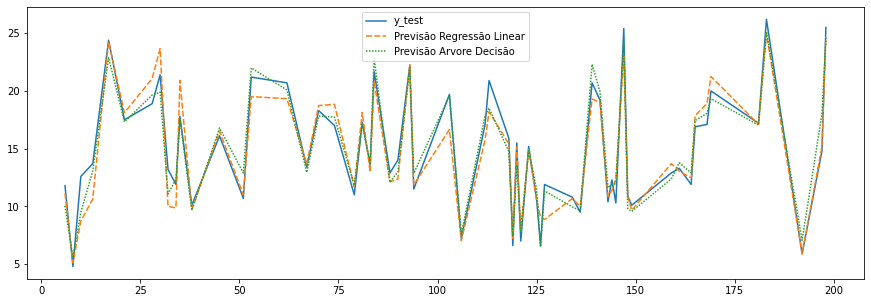

In [16]:
#DataFrame é o nome que o pandas da para tabela
tabela_auxiliar = pd.DataFrame() #Cria uma tabela vazia
tabela_auxiliar['y_test'] = y_teste
tabela_auxiliar['Previsão Regressão Linear'] = previsao_regressaolinear
tabela_auxiliar['Previsão Arvore Decisão'] = previsao_arvoredecisao
display(tabela_auxiliar)

plt.figure(figsize=(15, 5))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [17]:
tabela_nova = pd.read_csv('novos.csv')
display(tabela_nova)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [18]:
previsao = modelo_arvoredecisao.predict(tabela_nova)
print(previsao)

[ 7.754  9.17  20.964]
